#<strong><center>Machine Learning</center></strong> 
#<strong><center>Image Dataset</center></strong>

# **Introduction**

This notebook is for the `Image Processing` on `celeba-guess-hair dataset`.  It contains the following sections:

##### 1) some notes about the choices made in building the conventional ML model
##### 2) a description of the selected conventional ML model
##### 3) some notes about the choices made in building the deep model
##### 4) a description of the selected deep learning model
##### 5) a discussion of the performance of the two models



### **celeba-guess-hair dataset**
The dataset `celeba-guess-hair`, which contains 110749 labeled images (including both train and validation images) belonging to 4 object categories. 

The following cell performs the following steps :  
- imports the essential python libraries
- specifies the image size and 4 output classes i.e. hair colors
- loads the image dataset from exact dataset_directory


In [ ]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')

# declaring image_size(image size), hair_colours(number of categories), and dataset_directory 
image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = '/content/drive/My Drive/20comp8220/proj/image_dataset/' 

# loading train, validation, and test(public & private) data
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

#images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
#files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

#images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))
#files_test_private = np.load(join(dataset_directory, 'test_private_files.npy'))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


The following cell shows the file, category, and pixel values of 0th validation image.

In [ ]:
sample = 0
print(files_val[sample])
print(labels_val[sample])
# print(images_val[sample])

162772.jpg
0


The following cell shows the shape of 0th validation image.

In [ ]:
images_val[sample].shape

(48, 48, 3)

The following code shows the category(label) of 0th validation sample. 

In [ ]:
labels_val[sample]

0

**Hair color as per the category value**
- `0` : `black`
- `1` : `blond`
- `2` : `brown`
- `3` : `gray`


Let's quickly look at a few sample images from our dataset. The following cell shows some train images with their labels.

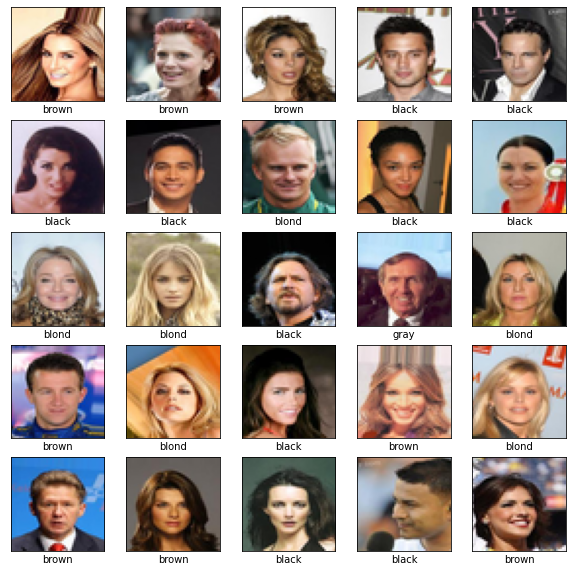

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(hair_colours[labels_train[i]])
plt.show()

The following cell shows some public test images which do not have their labels.

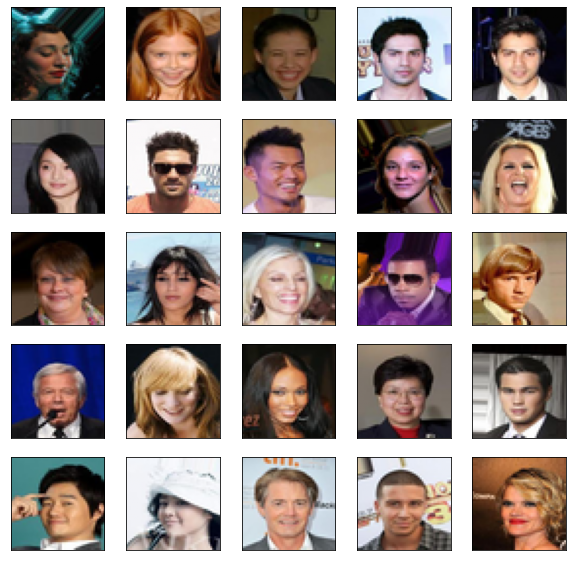

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_public[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()

# <center>**Conventional ML Models**</center>

The following cell reshapes these images, so that we can use them with following ML models.

In [ ]:
# reshaping all the images
images_train = images_train.reshape(98479, 6912) # 6912= 48 X 48 X 3= image_size * image_size * 3
images_val = images_val.reshape(12270,6912)
#images_test_public = images_test_public.reshape(11921,6912)
#images_test_private = images_test_private.reshape(13143,6912)


print(images_train.shape)
print(labels_train.shape)
print(images_val.shape)
print(labels_val.shape)
#print(images_test_public.shape)
#print(images_test_private.shape)

(98479, 6912)
(98479,)
(12270, 6912)
(12270,)


This means that our input image  will be shrunk to 48 x 48 pixels, and given three channels for each Red, Green, and Blue component respectively, our output “feature vector” will be a list of 48 x 48 x 3 = 6912 numbers.

## **1) Notes on the Conventional ML Model**

To obtain the final Conventional ML model, I tried the following models :-  
- KNN 
- Naive Bayes
- Decision Tree
- Random Forest
- SVM


*The exact relationship between the data to be classified and the
performance of various classification methods still
remains to be discovered. So far, there has been
no classification method that works best on any
given problem. There have been various problems to
the current classification methods we use today. To
determine the best classification method for a
certain dataset we still use trial and error to find the
best performance.*

## <center>KNN</center>
The k-Nearest Neighbor classifier is by far the most simple machine learning/image classification algorithm. In fact, it’s so simple that it doesn’t actually “learn” anything.

Inside, this algorithm simply relies on the distance between feature vectors, much like building an image search engine — only this time, we have the labels associated with each image so we can predict and return an actual category for the image.

Simply put, the k-NN algorithm classifies unknown data points by finding the most common class among the k-closest examples. Each data point in the k closest examples casts a vote and the category with the most votes wins!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(images_train,labels_train)

Finally, the k-NN algorithm is trained and evaluated for both the raw pixel intensities and color histograms.

In [ ]:
y_pred = knn.predict(images_test_public)

In [ ]:
from sklearn.metrics import accuracy_score
print("test accuracy of test data through KNN: ", accuracy_score(labels_val, y_pred))

test accuracy of test data through KNN:  0.6447105788423154


**KNN performed fairly poor (accuracy 64.4%). This may have been because of the general characteristics of the data to be classified.**


## <center>Naive Bayes</center>
Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms.

### <center>Gaussian NB</center>

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(images_train, labels_train)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(images_val)

In [ ]:
from sklearn.metrics import  accuracy_score
print("accuracy of validation data through GaussianNB: ", accuracy_score(labels_val, y_pred))

accuracy of validation data through GaussianNB:  0.5748981255093725


### <center>Multinomial NB</center>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(images_train, labels_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(images_val)

In [ ]:
from sklearn.metrics import  accuracy_score
print("accuracy of validation data through MultinomialNB: ", accuracy_score(labels_val, y_pred))

accuracy of validation data through MultinomialNB:  0.5013854930725347


**Naive Bayes performed ultimately poorly (accuracy 50% & 57%). This may have been because Naive Bayes is not good in handling unknown features, as we know, it is calculated based on conditional probability and if a condition never appears before, then it is just a very general prediction which won’t be very accurate.**

## <center>Decision Tree</center>
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(images_train,labels_train)

In [ ]:
y_pred=clf.predict(images_val)

In [ ]:
from sklearn.metrics import  accuracy_score
print("test accuracy of test data through Decision Tree: ", accuracy_score(labels_val, y_pred))

test accuracy of test data through Decision Tree:  0.7226568867155664


### <center>Decision Tree: Pre-pruning</center>
Pre-Pruning is used for initially limiting the maximum depth of a Decision Tree. 

In [ ]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=4)
clf.fit(images_train,labels_train)

In [ ]:
y_pred=clf.predict(images_val)

In [ ]:
from sklearn.metrics import  accuracy_score
print("accuracy of validation data through Decision Tree(max_depth 4): ", accuracy_score(labels_val, y_pred))

accuracy of validation data through Decision Tree(max_depth 4):  0.7219233903830481


The decision tree chooses the best feature according to which to classify our image so that the overall entropy reduces.

**Therefore, Decision Tree performed satisfactorily with accuracy of 72.2%.** 

## <center>Random Forest</center>
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, bootstrap=True,verbose=1)
rfc.fit(images_train,labels_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [ ]:
y_pred = rfc.predict(images_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [ ]:
from sklearn.metrics import accuracy_score
print("test accuracy of test data through Random Forest: ", accuracy_score(labels_val, y_pred))

test accuracy of test data through Random Forest:  0.7969845150774246


**Random Forest performed efficiently great with accuracy of approximately 80%. This may have been because it selects the best Decision Tree from numerous Randomly created Decision Trees.**

## <center>SVM (Support Vector Machine)</center>
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(images_train[:30000],labels_train[:30000])

In [ ]:
y_pred = svm.predict(images_val)

In [ ]:
from sklearn.metrics import accuracy_score
print("test accuracy of test data through SVM: ", accuracy_score(labels_val, y_pred))

test accuracy of test data through SVM:  0.8220048899755501


**SVM performed simply outstanding with accuracy of approximately 82%. This may have been because the SVM classifier separates data points using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points.**

## **2) Selected Conventional ML Model** 




The final model that produced the best-performing Conventional model predictions for the Kaggle submission (accuracy 86%) was an SVM with a polynomial kernel.  But, fitting all the train images and labels was taking a lot of time. So, I fitted for just first 30000 train images out of 98479, but still I achieved a validation accuracy of 82.2%.


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(images_train[:30000],labels_train[:30000])

In [ ]:
y_pred = svm.predict(images_val)

In [ ]:
from sklearn.metrics import accuracy_score
print("test accuracy of test data through SVM: ", accuracy_score(labels_val, y_pred))

test accuracy of test data through SVM:  0.8220048899755501


**Therefore, SVM offers very high accuracy as compared to other classifiers such as KNN, Naive Bayes, Decision Tree, and Random Forest. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.**

# <center>**Deep Learning ML Models**</center>



## **1) Notes on the Deep Learning Model**
To obtain the final Deep Learning model, I tried the following models :-  
- Tensorflow
- Keras
- Keras- CNN
- Keras- CNN with Data Augmentation
- Transfer Learning with Data Augmentation


*The exact relationship between the data to be classified and the
performance of various classification methods still
remains to be discovered. So far, there has been
no classification method that works best on any
given problem. There have been various problems to
the current classification methods we use today. To
determine the best classification method for a
certain dataset we still use trial and error to find the
best performance.*

## <center>Tenserflow</center>

In [ ]:
print(images_train.shape)
print(labels_train.shape)
print(images_val.shape)
print(labels_val.shape)

(98479, 6912)
(98479,)
(12270, 6912)
(12270,)


The following code defines a MinMaxScaler function to transform images.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(images_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
images_train = scaler.transform(images_train)
images_val = scaler.transform(images_val)

We will now define few training parameters (or "hyperparameters") and use tf.data API to shuffle our data and divide it into batches. Think of these as parameters - we build up our neural network model without knowledge of the actual data that will be fed into it; we just need to construct it in such a way that our data will fit in.

We'll use a Dataset within Tensorflow to wrap our traning features and labels, and use functions of the Dataset to randomly shuffle it and batch it up into smaller chunks for each iteration of training.

In [ ]:
num_classes = 4 # total classes (0-3 hair colors)
num_features = 6912 # data features (img shape: 28*28*3)


# Training parameters.
learning_rate = 0.0003
training_steps = 5000
batch_size = 150
display_step = 200

# Network parameters.
n_hidden = 128 # Number of neurons in 1st layer

In [ ]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((images_train, labels_train))
train_data = train_data.repeat().shuffle(98479).batch(batch_size).prefetch(1)

So let's start setting up that artificial neural network. We'll start by creating variables to store and keep track of weights and biases of different layers.

We'll need an input layer with one node per input pixel per image, or 6912 nodes. That will feed into a hidden layer of some arbitrary size - let's pick 128, given by n_hidden. That hidden layer will output 4 values, given by num_classes, corresonding to scores for each classification to be fed into softmax.

In [ ]:
# Store layers weight & bias

# A random value generator to initialize weights initially
random_normal = tf.initializers.RandomNormal()

weights = {
    'h': tf.Variable(random_normal([num_features, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))
}
biases = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

Now let's set up the neural network itself. We'll feed our input data into the first layer of our neural network. All this layer does is multiply these inputs by our weight "h" tensor which will be learned over time.

Then we'll feed that into our hidden layer, which applies the sigmoid activation function to the weighted inputs with our learned biases added in as well.

Finally our output layer, called out_layer, multiplies in the learned weights of the hidden layer and adds in the hidden layer's bias term.

In [ ]:
# Create model.
def neural_net(inputData):
    # Hidden fully connected layer with 512 neurons.
    hidden_layer = tf.add(tf.matmul(inputData, weights['h']), biases['b'])
    # Apply sigmoid to hidden_layer output for non-linearity.
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

This sets up a deep neural network like the one we talked about in our slides.

output layer

hidden layer

input layer

Next we will define our loss function for use in measuring our progress in gradient descent: cross-entropy, which applies a logarithmic scale to penalize incorrect classifications much more than ones that are close. In this function,  y_pred is the output of our final layer, and we're comparing that against the target labels used for training in y_true.

To compare our known "true" labels of 0-3 to the output of our neural network, we need to convert the labels to "one-hot" encoding. Our output layer has a neuron for each possible label of 0-3, not a single neuron with an integer in it.

In [ ]:
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-5, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

Now we will set up our stocastic gradient descent optimizer, based on our previously defined hyperparameters and our loss function defined above.

That learning rate is an example of a hyperparameter that may be worth experimenting with and tuning.

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate) #use Adam as well

def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

Next we'll train our neural network and measure its accuracy. First let's define some methods for measuring the accuracy of our trained model. 

correct_prediction will look at the output of our neural network and choose the label with the highest value, and see if that agrees with the target label given. During testing, digit_weights will be our prediction based on the test data we give the network, and target_labels is a placeholder that we will assign to our test labels. Ultimately this gives us a 1 for every correct classification, and a 0 for every incorrect classification.

"accuracy" then takes the average of all the classifications to produce an overall score for our model's accuracy.

In [ ]:
# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

Let's train this thing and see how it works! 

So we train our network in 5000 steps (or "epochs", given by training_steps) with batches of 250 samples set up earlier in our training data. At each step, we assign run our optimization function on the current batch of images and labels from the training data.

At every 100 epochs (given by display_step), we print out the current values of the loss function and our accuracy metric, by comparing our predicted labels against the known "true" labels. To do this we run our neural network using our trained weights and biases at each point on the current batch of training images, and compute cross entropy and accuracy of the resulting predictions ("pred") to the known correct labels ("batch_y").

In [ ]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch: %i, Loss: %f, Accuracy: %f" % (step, loss, acc))

Training epoch: 200, Loss: 132.682373, Accuracy: 0.633333
Training epoch: 400, Loss: 119.653496, Accuracy: 0.626667
Training epoch: 600, Loss: 124.013474, Accuracy: 0.653333
Training epoch: 800, Loss: 112.941429, Accuracy: 0.686667
Training epoch: 1000, Loss: 102.525909, Accuracy: 0.706667
Training epoch: 1200, Loss: 84.178528, Accuracy: 0.773333
Training epoch: 1400, Loss: 102.596817, Accuracy: 0.700000
Training epoch: 1600, Loss: 71.676758, Accuracy: 0.826667
Training epoch: 1800, Loss: 78.412605, Accuracy: 0.826667
Training epoch: 2000, Loss: 73.926941, Accuracy: 0.840000
Training epoch: 2200, Loss: 82.727028, Accuracy: 0.753333
Training epoch: 2400, Loss: 72.551964, Accuracy: 0.826667
Training epoch: 2600, Loss: 94.295456, Accuracy: 0.746667
Training epoch: 2800, Loss: 80.989983, Accuracy: 0.793333
Training epoch: 3000, Loss: 80.510147, Accuracy: 0.800000
Training epoch: 3200, Loss: 64.979980, Accuracy: 0.833333
Training epoch: 3400, Loss: 76.851219, Accuracy: 0.773333
Training epo

In [ ]:
# Test model on validation set.
pred = neural_net(images_val)
print("Test Accuracy: %f" % accuracy(pred, labels_val))

Test Accuracy: 0.822657


**Therefore, using Tensorflow we got an accuracy of 82.2% on valiadtion images. Not bad!**

## <center>Keras</center>
Keras is a higher-level API within TensorFlow that makes things a lot easier. Not only is it easier to use, it's easier to tune.

Let's set up the same deep neural network we set up with TensorFlow to learn from the celeba-guess-hair dataset.

First we'll import all the stuff we need, which will initialize Keras as a side effect:

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

Here's where things get exciting. All that code we wrote in Tensorflow creating placeholders, variables, and defining a bunch of linear algebra for each layer in our neural network? None of that is necessary with Keras!

We can set up the same layers like this. The input layer of 6912 features feeds into a ReLU layer of 512 nodes, which then goes into 4 nodes with softmax applied. Couldn't be simpler:

In [ ]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(6912,))) 
model.add(Dropout(0.4)) 
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3539456   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 3,541,508
Trainable params: 3,541,508
Non-trainable params: 0
_________________________________________________________________


Setting up our optimizer and loss function is just as simple. We will use the Adam optimizer here. Other choices include Adagrad, SGD, RMSprop, Adamax, and Nadam.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003),metrics=["accuracy"])

Training our model is also just one line of code with Keras. Here we'll do 10 epochs with a batch size of 150. Keras is slower, and if we're not running on top of a GPU-accelerated Tensorflow this can take a fair amount of time (that's why I've limited it to just 10 epochs.)

In [ ]:
history = model.fit(images_train, labels_train, epochs=8,batch_size=150,validation_data=(images_val, labels_val))

Epoch 1/8
657/657 [==============================] - 3s 5ms/step - loss: 0.7701 - accuracy: 0.6842 - val_loss: 0.5843 - val_accuracy: 0.7599
Epoch 2/8
657/657 [==============================] - 3s 5ms/step - loss: 0.5748 - accuracy: 0.7735 - val_loss: 0.4946 - val_accuracy: 0.8121
Epoch 3/8
657/657 [==============================] - 4s 7ms/step - loss: 0.5276 - accuracy: 0.7952 - val_loss: 0.4592 - val_accuracy: 0.8237
Epoch 4/8
657/657 [==============================] - 3s 4ms/step - loss: 0.5080 - accuracy: 0.8047 - val_loss: 0.4892 - val_accuracy: 0.8014
Epoch 5/8
657/657 [==============================] - 3s 5ms/step - loss: 0.4924 - accuracy: 0.8111 - val_loss: 0.4480 - val_accuracy: 0.8220
Epoch 6/8
657/657 [==============================] - 3s 5ms/step - loss: 0.4812 - accuracy: 0.8167 - val_loss: 0.4208 - val_accuracy: 0.8389
Epoch 7/8
657/657 [==============================] - 4s 6ms/step - loss: 0.4747 - accuracy: 0.8188 - val_loss: 0.4310 - val_accuracy: 0.8336
Epoch 8/8
657

In [ ]:
score = model.evaluate(images_val, labels_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41528061032295227
Test accuracy: 0.841972291469574


**Therefore, using Keras we got an accuracy of 84.19% on valiadtion images. That's better than Tenserflow**

## <center>Keras- CNN</center>


The following cell reshapes these images, so that we can use them with Keras CNN model.

The following cell performs the following steps :  
- imports the essential python libraries
- specifies the 4 output classes i.e. hair colors
- loads the image dataset from exact dataset_directory
- reshapes and normalizes the images 
- prints the shape of train, validation, test public and test private images  
 **Therefore, every single image has a size of (48,48,3)**

In [ ]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')

# declaring image_size(image size), hair_colours(number of categories), and dataset_directory 
image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = '/content/drive/My Drive/20comp8220/proj/image_dataset/' 

# loading train, validation, and test(public & private) data
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

#images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
#files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

#images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))
#files_test_private = np.load(join(dataset_directory, 'test_private_files.npy'))

# reshaping and normalizing all the images
images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
#images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0
#images_test_private = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0


# printing the shape of train, validation, and test public & test private images
print(images_train.shape)
print(images_val.shape)
print(labels_train.shape)
print(labels_val.shape)
#print(images_test_public.shape)
#print(images_test_private.shape)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(98479, 48, 48, 3)
(12270, 48, 48, 3)
(98479,)
(12270,)


This means that our input image  will be shrunk to 48 x 48 pixels, and given three channels for each Red, Green, and Blue component respectively, our output “feature vector” will be a list of 48 x 48 x 3 = 6912 numbers.

Let's use Keras on the celeba-guess-hair dataset again, this time using a Convolutional Neural Network that's better suited for image processing. CNN's are less sensitive to where in the image the pattern is that we're looking for.

With a multi-layer perceptron, we achieved around 84% accuracy. Let's see if we can beat that.

As before we'll start by importing the stuff we need, including the new layer types we talked about:

In [ ]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

Using TensorFlow backend.


Now for the meat of the problem. Setting up a convolutional neural network involves more layers. Not all of these are strictly necessary; you could run without pooling and dropout, but those extra steps help avoid overfitting and help things run faster.

We'll start with a 2D convolution of the image - it's set up to take 32 windows, or "filters", of each image, each filter being 3x3 in size.

We then run a second convolution on top of that with 64 3x3 windows - this topology is just what comes recommended within Keras's own examples. Again you want to re-use previous research whenever possible while tuning CNN's, as it is hard to do.

Next we apply a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.

A dropout filter is then applied to prevent overfitting.

Next we flatten the 2D layer we have at this stage into a 1D layer. So at this point we can just pretend we have a traditional multi-layer perceptron...

... and feed that into a hidden, flat layer of 128 units.

We then apply dropout again to further prevent overfitting.

And finally, we feed that into our final 4 units where softmax is applied to choose our category of 0-3.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(48,48,3)), # 32 3x3 kernels
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 3x3 kernels
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Reduce by taking the max of each 2x2 block
    keras.layers.Dropout(0.5), # Dropout to avoid overfitting
    keras.layers.Flatten(), # Flatten the results to one dimension for passing into our final layer
    keras.layers.Dense(128, activation="relu"), # A hidden layer to learn with 82 neurons
    keras.layers.Dropout(0.45), # Another dropout
    keras.layers.Dense(4, activation="softmax") # Final categorization from 0-3 with softmax
]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              



We are still doing multiple categorization, so sparse_categorical_crossentropy is still the right loss function to use. We'll use the Adam optimizer.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.003),metrics=["accuracy"])

And now we train our model

In [ ]:
model.fit(images_train, labels_train,epochs=5,validation_data=(images_val, labels_val))

Epoch 1/5
3078/3078 [==============================] - 522s 170ms/step - loss: 0.4351 - accuracy: 0.8374 - val_loss: 0.3302 - val_accuracy: 0.8760
Epoch 2/5
3078/3078 [==============================] - 517s 168ms/step - loss: 0.3278 - accuracy: 0.8810 - val_loss: 0.2870 - val_accuracy: 0.8919
Epoch 3/5
3078/3078 [==============================] - 517s 168ms/step - loss: 0.2920 - accuracy: 0.8936 - val_loss: 0.3586 - val_accuracy: 0.8726
Epoch 4/5
3078/3078 [==============================] - 524s 170ms/step - loss: 0.2691 - accuracy: 0.9013 - val_loss: 0.3176 - val_accuracy: 0.8872
Epoch 5/5
3078/3078 [==============================] - 521s 169ms/step - loss: 0.2436 - accuracy: 0.9101 - val_loss: 0.3210 - val_accuracy: 0.8912


**Approximately 89%! And that's with just 5 epochs! It came at a significant cost in terms of computing power, but when you start distributing things over multiple computers each with multiple GPU's, that cost starts to feel less bad.**

## <center>Keras- CNN with Data Augmentation</center>

### Improving the results

89.12% top-5 accuracy on 4 classes, roughly evenly distributed, is a pretty good achievement. Nevertheless, it is much better than what we were able to achieve with our original network, and there is room for improvement. Some techniques which possibly could have improved our performance.

- Using data augementation: augmentation refers to using various modifications of the original training data, in the form of distortions, rotations, rescalings, lighting changes, etc to increase the size of the training set and create more tolerance for such distortions.

In [ ]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

Using TensorFlow backend.


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(48,48,3)), # 32 3x3 kernels
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 3x3 kernels
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Reduce by taking the max of each 2x2 block
    keras.layers.Dropout(0.5), # Dropout to avoid overfitting
    keras.layers.Flatten(), # Flatten the results to one dimension for passing into our final layer
    keras.layers.Dense(128, activation="relu"), # A hidden layer to learn with 82 neurons
    keras.layers.Dropout(0.45), # Another dropout
    keras.layers.Dense(4, activation="softmax") # Final categorization from 0-3 with softmax
]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zoom_range=0.2,
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(images_train)

These are some of the options that we used for Data Augmentation to modify our original training data, in the form of distortions, rotations, rescalings, lighting changes, etc to increase the size of the training set and create more tolerance for such distortions.
Let's quickly go over what we just wrote:
- **rotation_range** is a value in degrees (0-180), a range within which to randomly rotate pictures
- **width_shift and height_shift** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- **rescale** is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- **shear_range** is for randomly applying shearing transformations
zoom_range is for randomly zooming inside pictures
- **zoom_range** A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.
- **horizontal_flip** is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- **fill_mode** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
from keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003),metrics=["accuracy"])

In [ ]:
model.fit_generator(datagen.flow(images_train, labels_train, batch_size = 32),
                    steps_per_epoch = len(images_train) / 32, # number of samples per gradient update
                    epochs = 10, # number of iterations
                    validation_data= (images_val, labels_val),
                    verbose=1)

Epoch 1/10
3078/3077 [==============================] - 494s 160ms/step - loss: 0.5970 - accuracy: 0.7789 - val_loss: 0.4386 - val_accuracy: 0.8350
Epoch 2/10
3078/3077 [==============================] - 498s 162ms/step - loss: 0.5449 - accuracy: 0.8008 - val_loss: 0.4512 - val_accuracy: 0.8233
Epoch 3/10
3078/3077 [==============================] - 493s 160ms/step - loss: 0.5142 - accuracy: 0.8131 - val_loss: 0.3690 - val_accuracy: 0.8624
Epoch 4/10
3078/3077 [==============================] - 494s 161ms/step - loss: 0.4882 - accuracy: 0.8229 - val_loss: 0.4025 - val_accuracy: 0.8489
Epoch 5/10
3078/3077 [==============================] - 495s 161ms/step - loss: 0.4761 - accuracy: 0.8276 - val_loss: 0.3828 - val_accuracy: 0.8572
Epoch 6/10
3078/3077 [==============================] - 495s 161ms/step - loss: 0.4606 - accuracy: 0.8333 - val_loss: 0.4209 - val_accuracy: 0.8340
Epoch 7/10
3078/3077 [==============================] - 501s 163ms/step - loss: 0.4509 - accuracy: 0.8375 - val_

In [ ]:
scores = model.evaluate(images_train, labels_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.89%


**Therefore, using `Keras- CNN with Data Augmentation` we got an accuracy of approximately 88% on valiadtion images. However, its accuracy is slightly lower than `Keras- CNN without Data Augmentation` ones (i.e. 89.12%) because it reduces the overfitting and performs well on other unknown datasets.**

## <center>Transfer Learning with Data Augmentation</center>

Along with Keras- CNN model, I also tried to apply Transfer based on the MobileNetV2 architecture, basically is the same model but without the top classification layers (MobileNetV2 is built to output 1000 class probabilities). Hence, I added a 4 class `softmax` output layer at the bottom of MobileNetV2 architecture.

In [ ]:
from keras.models import Model 
from keras.layers import Dropout, Dense, BatchNormalization
from keras.applications.mobilenet_v2 import MobileNetV2

def build_model(num_features):
  base = MobileNetV2(input_shape=(48, 48, 3),
                     weights=None,
                     include_top=False,
                     pooling='avg')  # GlobalAveragePooling 2D
  
  # model top
  x = base.output
  x = Dense(128, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.3)(x)
  top = Dense(4, activation='softmax')(x)
  
  return Model(inputs=base.input, outputs=top)

In [ ]:
model = build_model(num_features=image_size)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 49, 49, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# augumentations for training set:
datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

In [ ]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003),metrics=["accuracy"])

In [ ]:
model.fit_generator(datagen.flow(images_train, labels_train),
                    epochs = 10, 
                    validation_data= (images_val, labels_val),  
                    verbose=1)

Epoch 1/10
3078/3078 [==============================] - 941s 306ms/step - loss: 1.0195 - accuracy: 0.5668 - val_loss: 1.3852 - val_accuracy: 0.3673
Epoch 2/10
3078/3078 [==============================] - 934s 303ms/step - loss: 0.6209 - accuracy: 0.7618 - val_loss: 0.8106 - val_accuracy: 0.7071
Epoch 3/10
3078/3078 [==============================] - 928s 301ms/step - loss: 0.4863 - accuracy: 0.8209 - val_loss: 0.5345 - val_accuracy: 0.8482
Epoch 4/10
3078/3078 [==============================] - 927s 301ms/step - loss: 0.4187 - accuracy: 0.8465 - val_loss: 0.7165 - val_accuracy: 0.8227
Epoch 5/10
3078/3078 [==============================] - 926s 301ms/step - loss: 0.3829 - accuracy: 0.8615 - val_loss: 1.1516 - val_accuracy: 0.7365
Epoch 6/10
3078/3078 [==============================] - 931s 303ms/step - loss: 0.3589 - accuracy: 0.8696 - val_loss: 0.5747 - val_accuracy: 0.8170
Epoch 7/10
3078/3078 [==============================] - 932s 303ms/step - loss: 0.3332 - accuracy: 0.8796 - val_

**Therefore, after using `Transfer Learning (MobileNetV2) with Data Augmentation` I got an accuracy of approximately 88%. However, using `Keras- CNN with Data Augmentation` I got the same accuracy of 88%. So, I decided to use `Keras- CNN with Data Augmentation` model because it is very lightweight model as compared to `Transfer Learning (MobileNetV2) with Data Augmentation` and also takes less computation time.**

## **2) Selected Deep Learning Model**


The final model that produced the best-performing Deep Learning model predictions for the Kaggle submission (accuracy 92%) was a `Keras- CNN with Data Augmentation`. That model contains 2 Conv2D, 1 MaxPooling2D, 2 Dropout, 1 Flatten, and 2 Dense Layers. Besides, some Data Augmentation parameters such as rotation_range, width_shift_range, height_shift_range, shear_range, zoom_range, horizontal_flip, fill_mode, and so on. Hence, it achieved a validation accuracy of approximately 88%.














In [ ]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

Using TensorFlow backend.


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(48,48,3)), # 32 3x3 kernels
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 3x3 kernels
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Reduce by taking the max of each 2x2 block
    keras.layers.Dropout(0.5), # Dropout to avoid overfitting
    keras.layers.Flatten(), # Flatten the results to one dimension for passing into our final layer
    keras.layers.Dense(128, activation="relu"), # A hidden layer to learn with 82 neurons
    keras.layers.Dropout(0.45), # Another dropout
    keras.layers.Dense(4, activation="softmax") # Final categorization from 0-3 with softmax
]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zoom_range=0.2,
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(images_train)

In [ ]:
from keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003),metrics=["accuracy"])

In [ ]:
model.fit_generator(datagen.flow(images_train, labels_train, batch_size = 32),
                    steps_per_epoch = len(images_train) / 32, # number of samples per gradient update
                    epochs = 10, # number of iterations
                    validation_data= (images_val, labels_val),
                    verbose=1)

Epoch 1/10
3078/3077 [==============================] - 494s 160ms/step - loss: 0.5970 - accuracy: 0.7789 - val_loss: 0.4386 - val_accuracy: 0.8350
Epoch 2/10
3078/3077 [==============================] - 498s 162ms/step - loss: 0.5449 - accuracy: 0.8008 - val_loss: 0.4512 - val_accuracy: 0.8233
Epoch 3/10
3078/3077 [==============================] - 493s 160ms/step - loss: 0.5142 - accuracy: 0.8131 - val_loss: 0.3690 - val_accuracy: 0.8624
Epoch 4/10
3078/3077 [==============================] - 494s 161ms/step - loss: 0.4882 - accuracy: 0.8229 - val_loss: 0.4025 - val_accuracy: 0.8489
Epoch 5/10
3078/3077 [==============================] - 495s 161ms/step - loss: 0.4761 - accuracy: 0.8276 - val_loss: 0.3828 - val_accuracy: 0.8572
Epoch 6/10
3078/3077 [==============================] - 495s 161ms/step - loss: 0.4606 - accuracy: 0.8333 - val_loss: 0.4209 - val_accuracy: 0.8340
Epoch 7/10
3078/3077 [==============================] - 501s 163ms/step - loss: 0.4509 - accuracy: 0.8375 - val_

In [ ]:
scores = model.evaluate(images_train, labels_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.89%


**Therefore, the Deep Learning Model mentioned above was my final model for Kaggle Submission.**

# <center>**Discussion of both the Conventional ML & the Deep Learning Models Performance and Implementation**</center>


### <center>**Conventional ML models accuracy**</center>

**`Validation` set accuracy of my `final Conventional ML model(SVM)` was `82.2%`.**  
 
**`public test` set accuracy of my `final Conventional ML model(SVM)` was `86.62%`.** 

**`private test` set accuracy of my `final Conventional ML model(SVM)` was approx. `57%`.** 






### <center>**Deep Learning models accuracy**</center>

**`Validation` set accuracy of my `final Deep Learning model(Keras- CNN with Data Augmentation)` was `87.89%`.**  

**`public test` set accuracy of my `final Deep Learning model(Keras- CNN with Data Augmentation)` was `92.11%`.**   

**`private test` set accuracy of my `final Deep Learning model(Keras- CNN with Data Augmentation)` was approx. `61%`.**   





- Therefore, comparing my final `conventional ML` and `deep learning` models, the `deep learning` one performed better by approximately 5% on the `validation` and `public test` set as well.  

- The `deep learning` model ranked #31 out of 56 submissions on the `public test` set, with the top-performing system having 92.114% accuracy, and a majority class baseline having 89-90% accuracy.**




### <center>**Conclusion**</center>

- Therefore, comparing the performance on `validation` set versus `public test` set, the `public test` set performed better by approximately 5% for both `conventional ML` and `deep learning` models. 
- Therefore, comparing the performance on `private test` set versus `public test` set, the `public test` set performed better by approximately 30% for both `conventional ML` and `deep learning` models. 
- Inspecting all the data sets, it could be said that `public test` & `validation` sets were highly correlated to `train` set, however `private test` set was slightly correlated to `train` set.
- Inspecting the models(`Conventional` & `Deep Learning`), it could be easily said that `Deep Learning` Models performed simply outstanding by approximately 5% accuracy as compared to `Conventional ML` models. 
